<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/SHAP_PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

Mounted at /content/drive
 Advertising.html
'Akshata KM Resume.pdf'
'Akshata Resume.pdf'
'Colab Notebooks'
'Data Science and Big Data Analytics.pdf'
'Document Back up Boeing '
 Epic_Data_Analysis.ipynb
 Epic_Sample.csv
 FeatureHumana.csv
 holdout.csv
 holdoutmodel.csv
 inputmodel.csv
 interpretable_tree.png
 modeldata.csv
'New_data (1).csv'
 New_data.csv
 NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv
 OutputResultsHumana.csv
 PCOS_Data.csv
 SWEETVIZ_REPORT.html
'UMD Textbooks'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'USA Visa Documents'
/content/drive/My Drive


In [3]:
! pip install shap
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

     |████████████████████████████████| 327kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456458 sha256=0ef0892002d107b65bd50ab9e88156172d9d677cfa22dd3fab0b43b113bc6024
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [5]:


import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]
df = pd.read_csv('PCOS_Data.csv')
from sklearn.model_selection import train_test_split

target = 'PCOS (Y/N)'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [6]:
# lists what we can extract from the sklearn toy dataset
dir(df)

['BMI',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__'

In [7]:
# imports
import pandas as pd
import numpy as np

# Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Some Scikit-learn utils
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

# Models
from xgboost import XGBClassifier, plot_importance

# Some cosmetics add-ons
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [8]:
# ML in two lines ;)
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
%time xgb.fit(df_Xtrain, ytrain)

CPU times: user 134 ms, sys: 18.5 ms, total: 153 ms
Wall time: 173 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:

# make predictions for test data
xgb_predictions = xgb.predict(df_Xtest)

In [13]:
# We design a simple classification evaluative function
def evaluation_scores(test, prediction, target_names=None):
    print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('classification report:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=df_Xtest, y_pred=prediction, labels=classes)
    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
    
    print('-'*60)
    print('Confusion matrix:\n')
    print(cm_frame)

In [14]:
# Evaluate predictions
evaluation_scores(ytest, xgb_predictions, target_names=['0', '1'])

Accuracy: 0.9245
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.88      0.88      0.88        34

    accuracy                           0.92       106
   macro avg       0.91      0.91      0.91       106
weighted avg       0.92      0.92      0.92       106



ValueError: ignored

In [15]:
# load JS visualization code to notebook
shap.initjs()

In [16]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(df_Xtest)
print('Expected Value: ', explainer.expected_value)

Expected Value:  -0.95061964


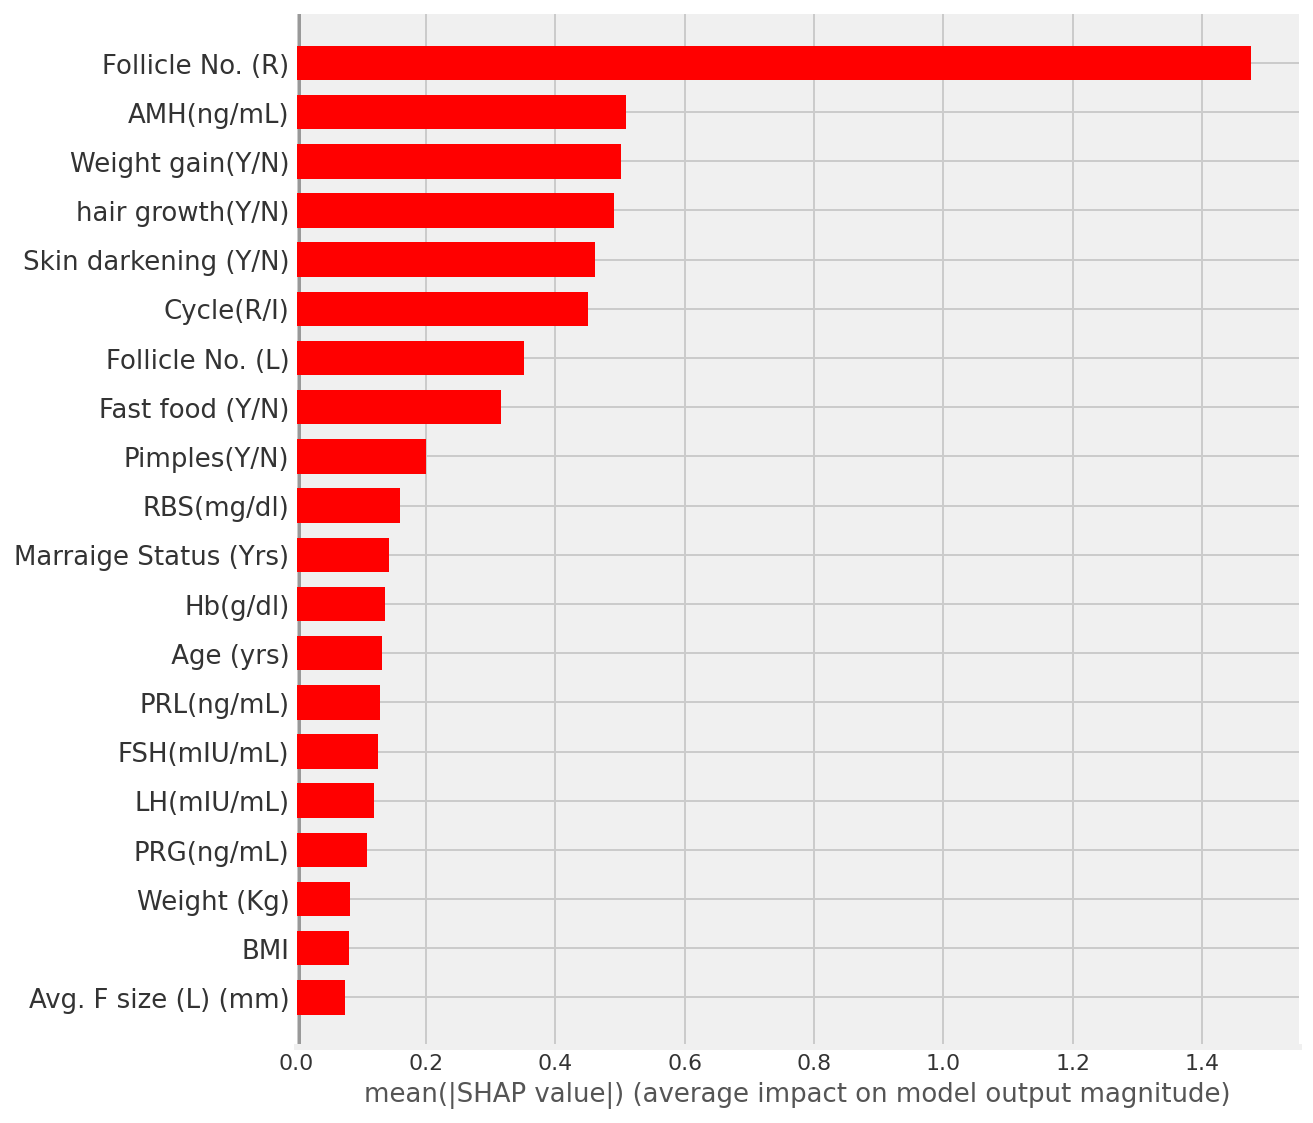

In [17]:
shap.summary_plot(shap_values, df_Xtest, plot_type="bar", color='red')

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], df_Xtest.iloc[0,:])

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4,:], df_Xtest.iloc[4,:])

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], df_Xtest.iloc[:1000,:])

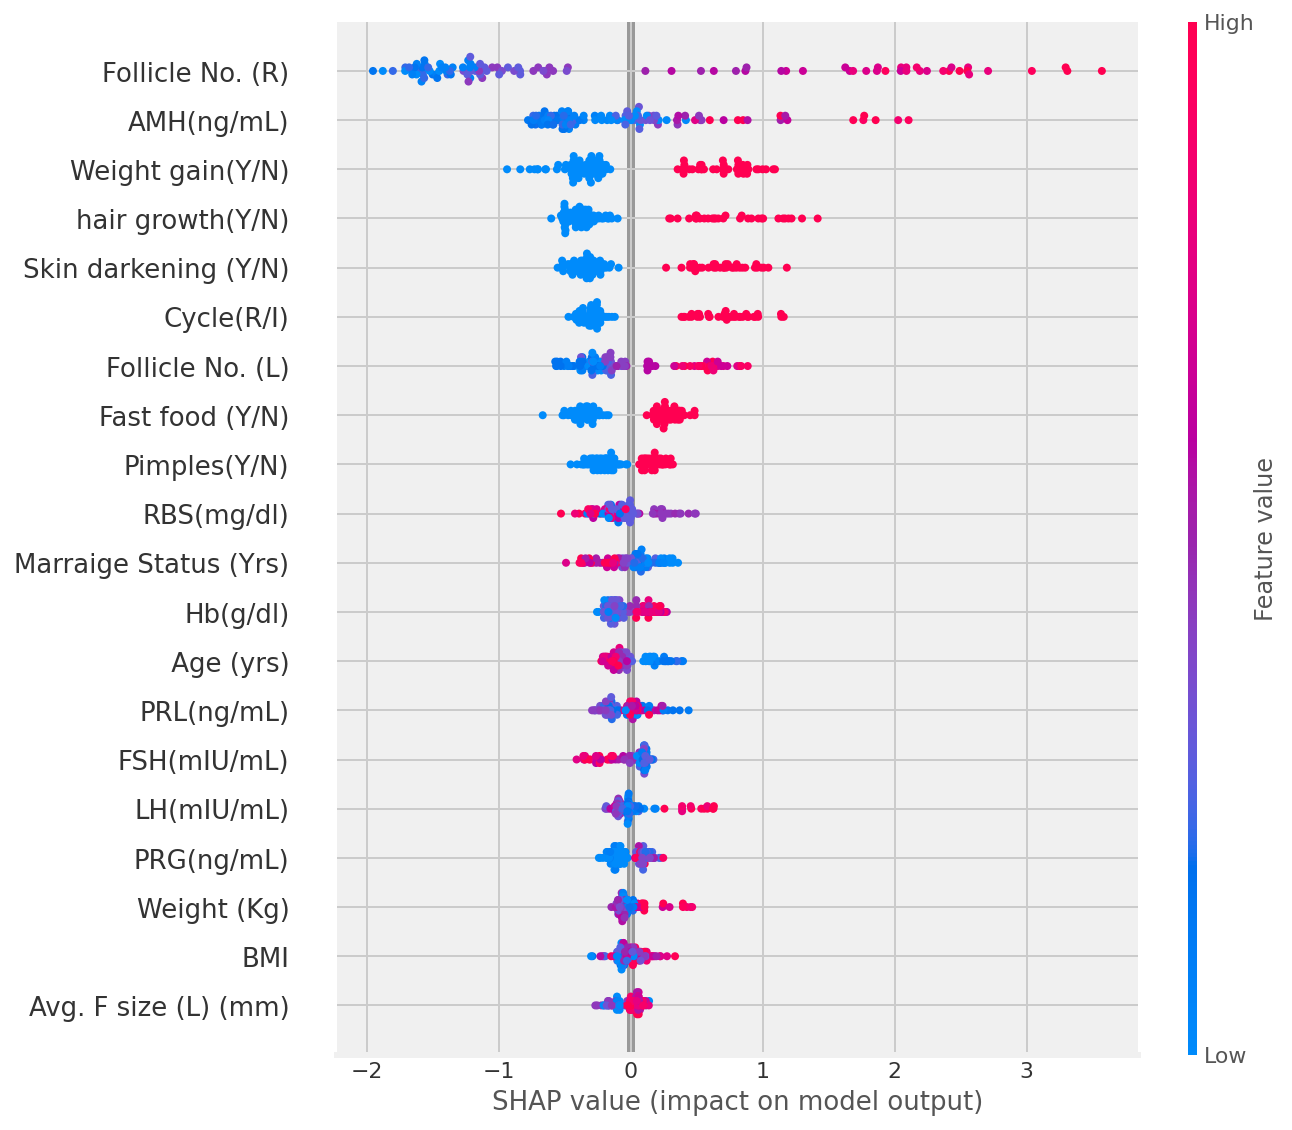

In [21]:
shap.initjs()
shap.summary_plot(shap_values, df_Xtest)

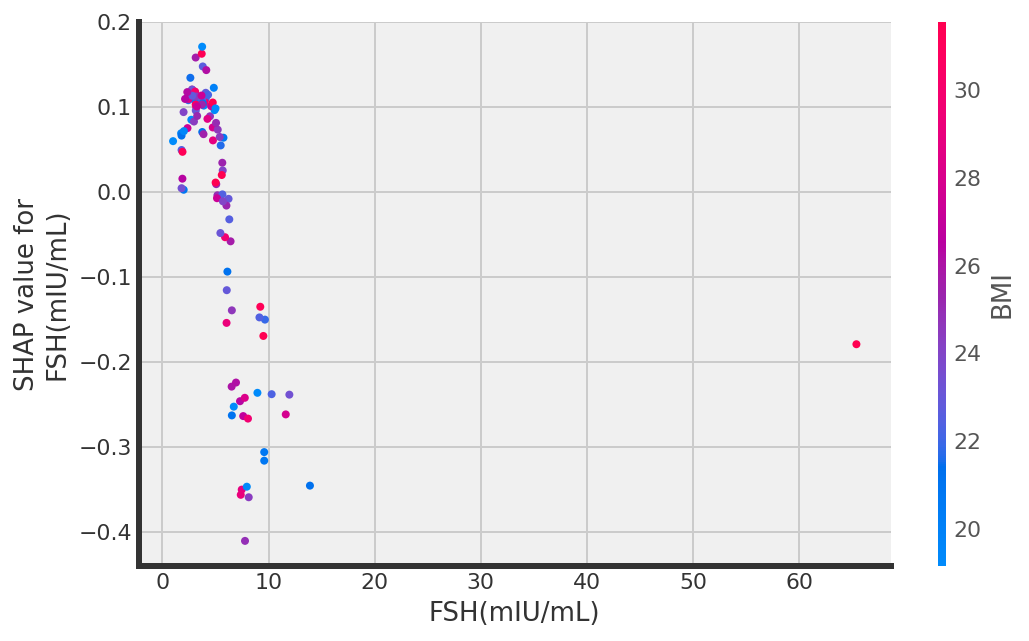

In [22]:

shap.dependence_plot(ind='FSH(mIU/mL)', interaction_index='BMI',
                     shap_values=shap_values, 
                     features=df_Xtest,  
                     display_features=df_Xtest)